In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

In [6]:
months = np.array([0, 1, 3, 5, 7])
progress = np.array([0, 500, 1200, 2000, 3500])
goal = 10000
time_limit = 12

poly_degree = 3
poly = PolynomialFeatures(degree=poly_degree)
X = poly.fit_transform(months.reshape(-1, 1)) 

model = LinearRegression()
model.fit(X, progress) 

all_months = np.arange(0, time_limit + 1).reshape(-1, 1)
X_all_months = poly.transform(all_months)
projection = model.predict(X_all_months) 

goal_months = all_months[projection >= goal]
if len(goal_months) > 0:
    goal_month = goal_months[0][0]
    message = f"The goal will be reached in month {goal_month}."
else:
    message = "The goal will not be reached within the time limit." 

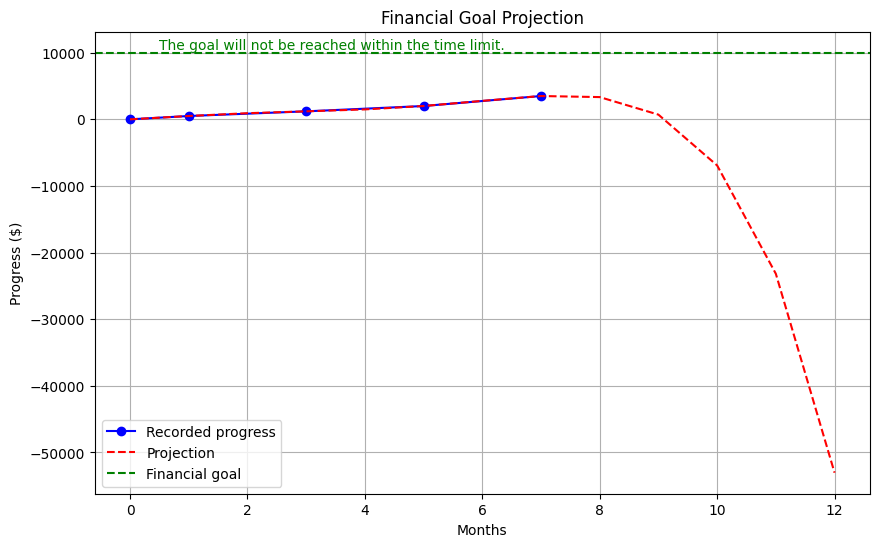

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(months, progress, 'bo-', label="Recorded progress")
plt.plot(all_months, projection, 'r--', label="Projection")
plt.axhline(goal, color='g', linestyle='--', label="Financial goal")

plt.title("Financial Goal Projection")
plt.xlabel("Months")
plt.ylabel("Progress ($)")
plt.legend()
plt.grid(True)
plt.text(0.5, goal + 500, message, color="green" if "reached" in message else "red")
plt.show() 

In [8]:
print(message)

The goal will not be reached within the time limit.
